In [1]:
import sys
sys.path
sys.path.append('../')

In [2]:
from torchvision import datasets, transforms
import src.actlearn as al

In [3]:
al.ActiveLearning.set_seed()

In [4]:
train_mnist = datasets.MNIST('./data', train=True, download=True)
test_mnist = datasets.MNIST('./data', train=False, download=True)
train_fashion = datasets.FashionMNIST('./data', train=True, download=True, transform=transforms.ToTensor())
test_fashion = datasets.FashionMNIST('./data', train=False, download=True, transform=transforms.ToTensor())

X_train_mnist = train_mnist.data
y_train_mnist = train_mnist.targets
X_test_mnist = test_mnist.data
y_test_mnist = test_mnist.targets

X_train_fashion = train_fashion.data
y_train_fashion = train_fashion.targets
X_test_fashion = test_fashion.data
y_test_fashion = test_fashion.targets

alpha = 0.1
def reduce_dataset(X, y, alpha):
    n_samples = len(X)
    n_keep = int(alpha * n_samples)

    return X[:n_keep], y[:n_keep]

X_train_mnist, y_train_mnist = reduce_dataset(X_train_mnist, y_train_mnist, alpha)
X_test_mnist, y_test_mnist = reduce_dataset(X_test_mnist, y_test_mnist, alpha)
X_train_fashion, y_train_fashion = reduce_dataset(X_train_fashion, y_train_fashion, alpha)
X_test_fashion, y_test_fashion = reduce_dataset(X_test_fashion, y_test_fashion, alpha)
print(X_train_mnist.shape, y_train_mnist.shape, X_test_mnist.shape, y_test_mnist.shape)
print(X_train_fashion.shape, y_train_fashion.shape, X_test_fashion.shape, y_test_fashion.shape)

torch.Size([6000, 28, 28]) torch.Size([6000]) torch.Size([1000, 28, 28]) torch.Size([1000])
torch.Size([6000, 28, 28]) torch.Size([6000]) torch.Size([1000, 28, 28]) torch.Size([1000])


Margin vs. Entropy (MNIST)

In [5]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", logs=True)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1", logs=True)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="entropy", al_type="cumulative", update_size=128, batch_size=128, metric="f1", logs=True)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", logs=True)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", logs=True)

AL TRAINING STARTED (incremental random)
Training AL: incremental random | Доля: 2.133
Training AL: incremental random | Доля: 4.267
Training AL: incremental random | Доля: 6.400
Training AL: incremental random | Доля: 8.533
Training AL: incremental random | Доля: 10.667
Training AL: incremental random | Доля: 12.800
Training AL: incremental random | Доля: 14.933
Training AL: incremental random | Доля: 17.067
Training AL: incremental random | Доля: 19.200
Training AL: incremental random | Доля: 21.333
Training AL: incremental random | Доля: 23.467
Training AL: incremental random | Доля: 25.600
Training AL: incremental random | Доля: 27.733
Training AL: incremental random | Доля: 29.867
Training AL: incremental random | Доля: 32.000
Training AL: incremental random | Доля: 34.133
Training AL: incremental random | Доля: 36.267
Training AL: incremental random | Доля: 38.400
Training AL: incremental random | Доля: 40.533
Training AL: incremental random | Доля: 42.667
Training AL: incrementa

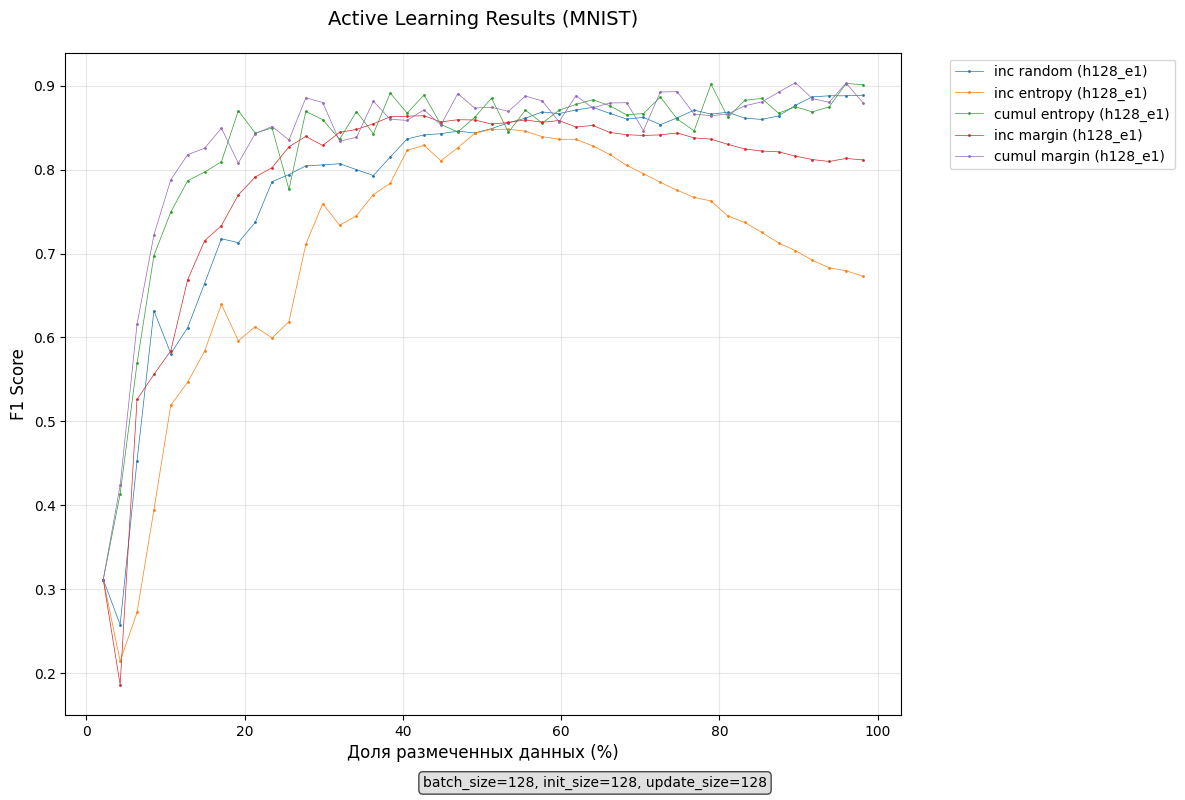

In [6]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Margin vs. Entropy (Fashion-MNIST)

In [7]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="entropy", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (incremental entropy)
AL TRAINING FINISHED (incremental entropy)

AL TRAINING STARTED (cumulative entropy)
AL TRAINING FINISHED (cumulative entropy)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)



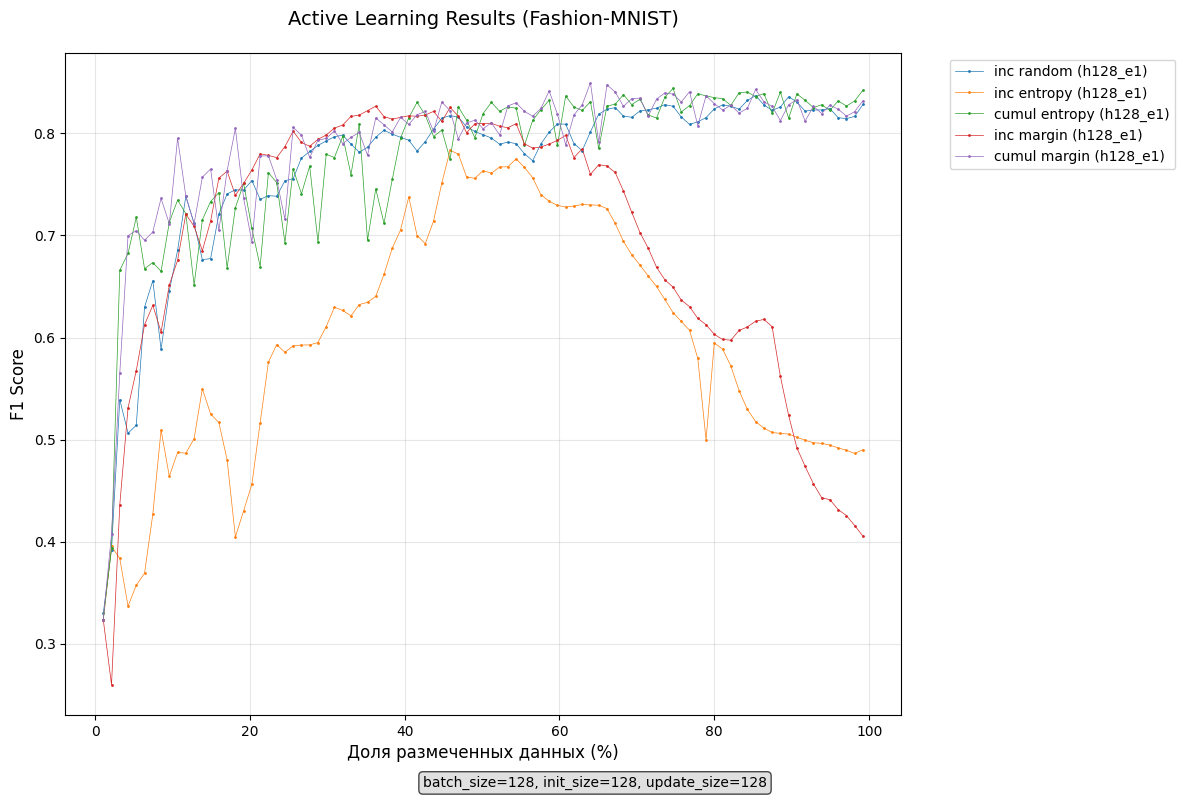

In [8]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Margin vs. Confidence (MNIST)

In [9]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="confidence", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="confidence", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (incremental confidence)
AL TRAINING FINISHED (incremental confidence)

AL TRAINING STARTED (cumulative confidence)
AL TRAINING FINISHED (cumulative confidence)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)



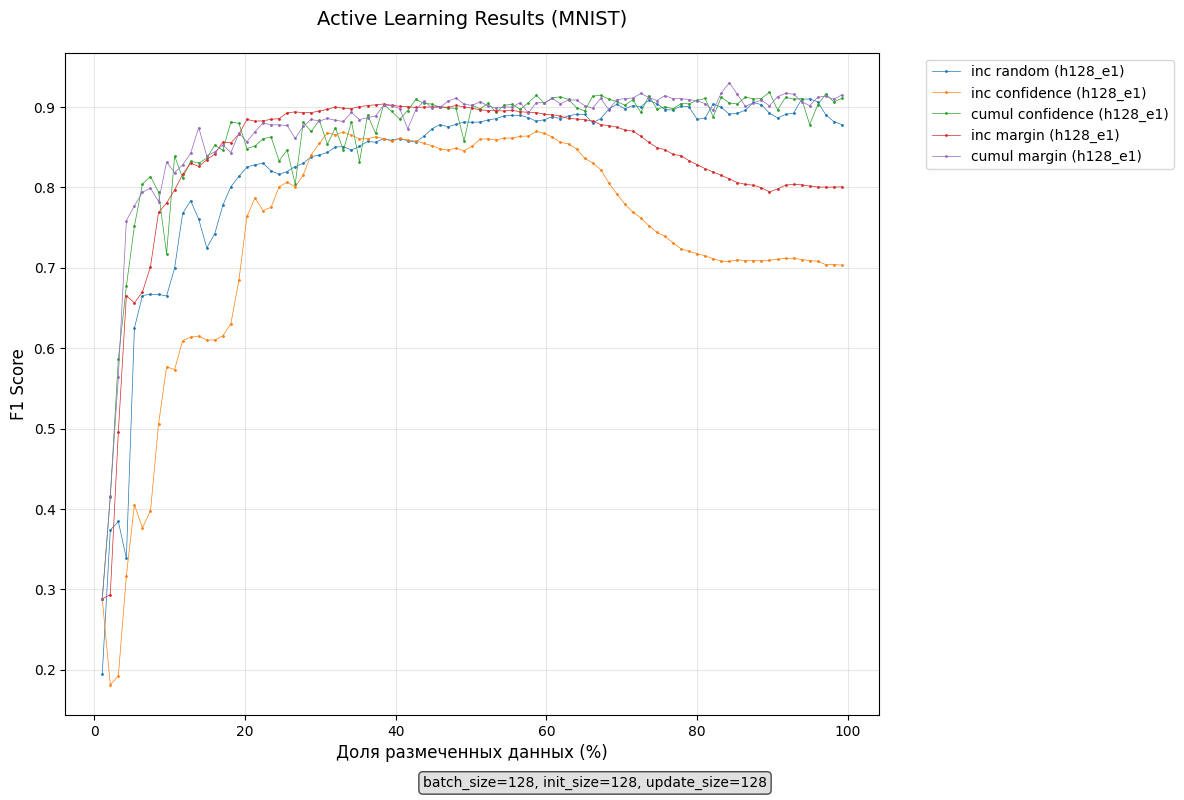

In [10]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Margin vs. Confidence (Fashion-MNIST)

In [11]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="confidence", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="confidence", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (incremental confidence)
AL TRAINING FINISHED (incremental confidence)

AL TRAINING STARTED (cumulative confidence)
AL TRAINING FINISHED (cumulative confidence)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)



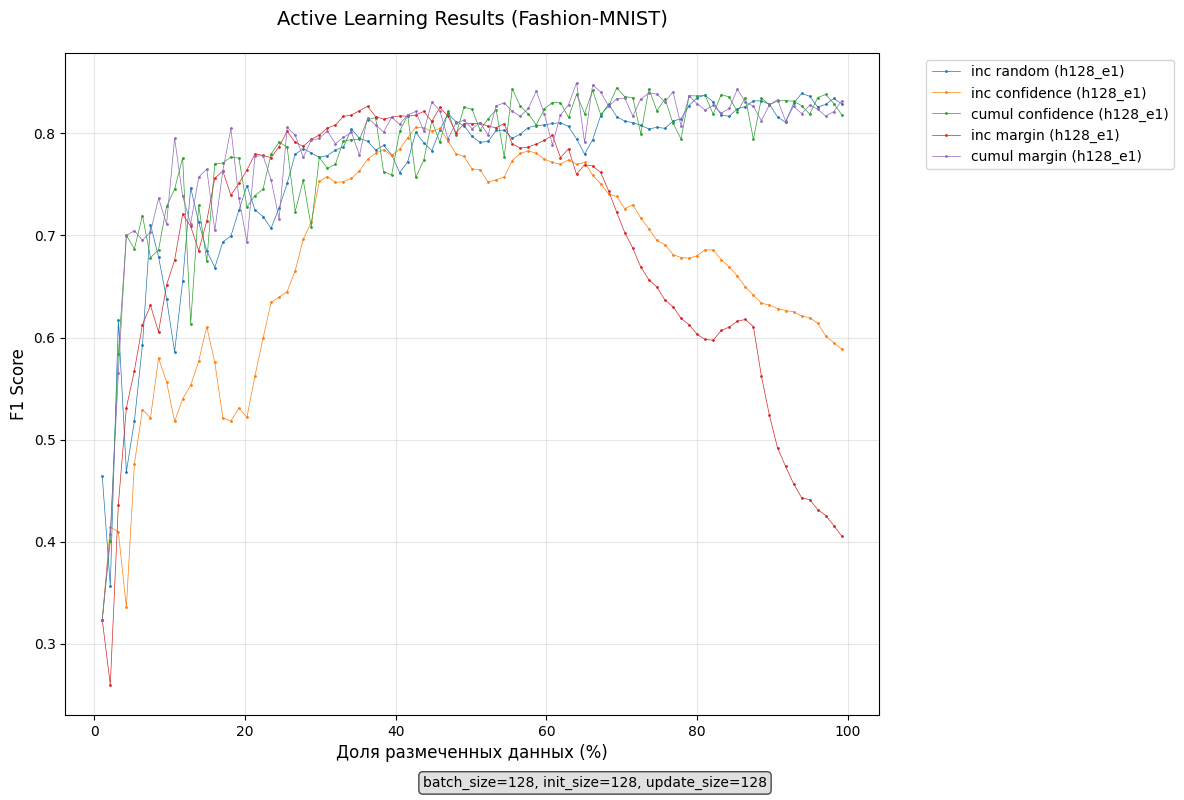

In [12]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Varying skip_size (MNIST)

In [13]:
AL1 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=4)
AL2 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=8)
AL3 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=16)
AL4 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)
AL5 = al.ActiveLearning(al.ANN(), X_train_mnist, y_train_mnist, X_test_mnist, y_test_mnist,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=32)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



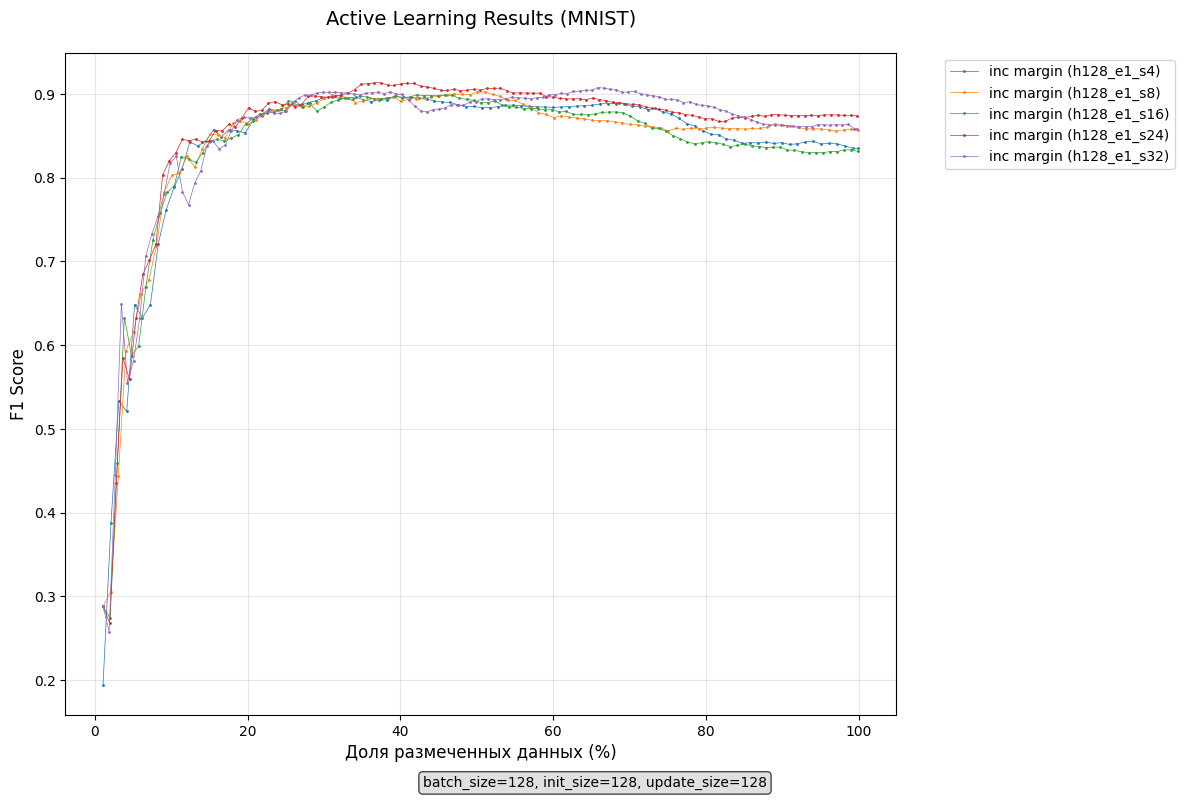

In [14]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="MNIST")

Varying skip_size (Fashion-MNIST)

In [17]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=4)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=8)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=16)
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=24)
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", skip=True, skip_size=32)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



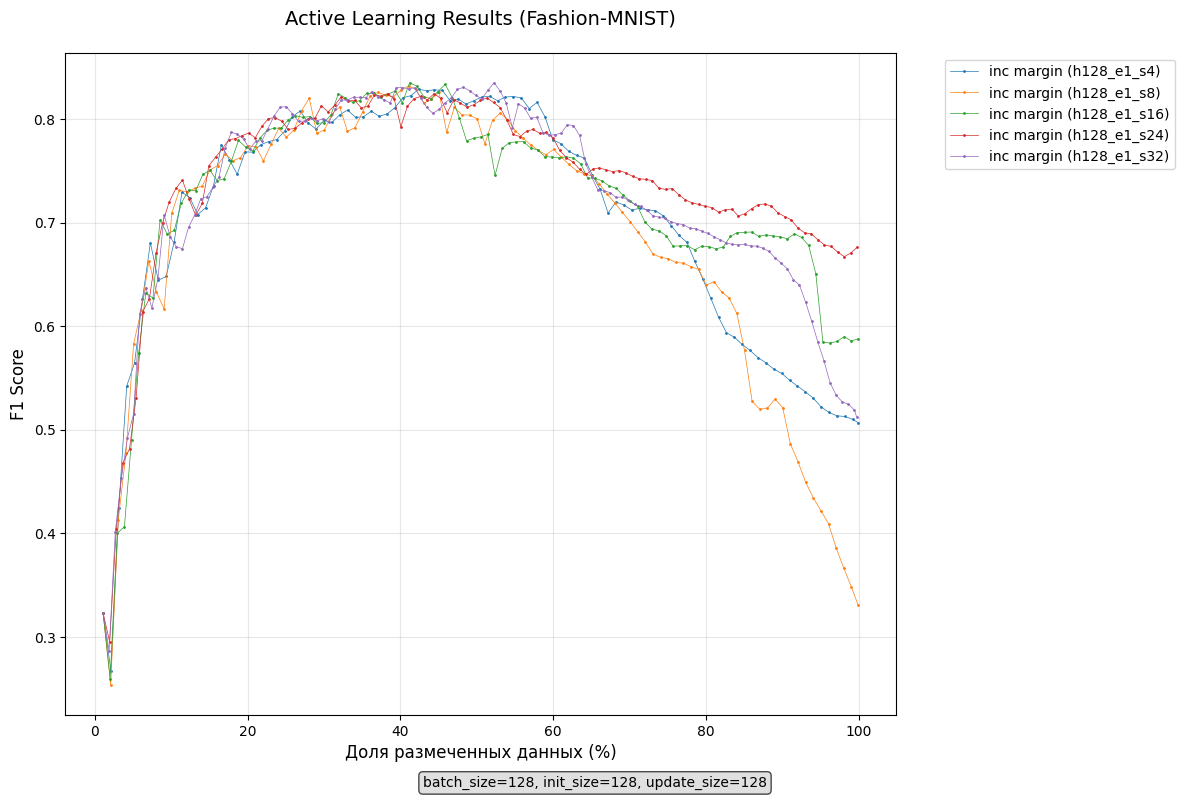

In [18]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, dataset_name="Fashion-MNIST")

Varying epochs on margin (Fashion-MNIST)

In [25]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=3)
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=5)
AL6 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL7 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=10)
AL8 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



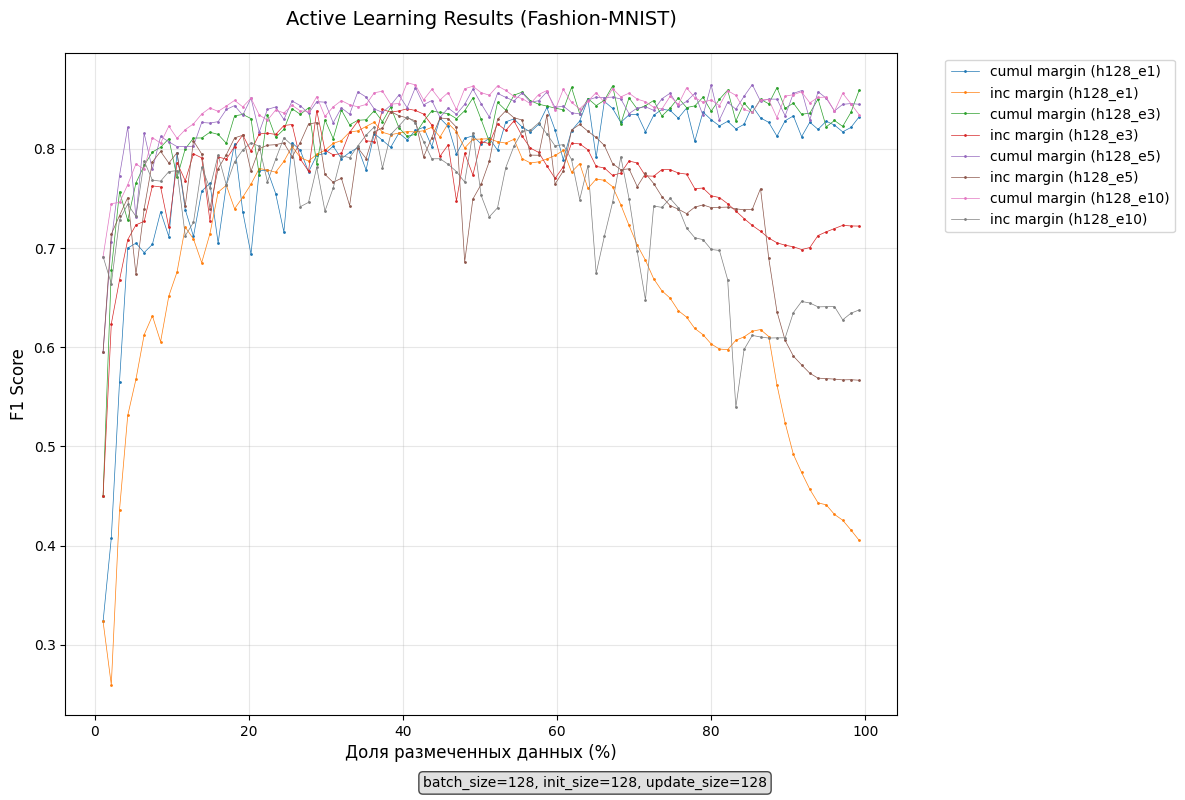

In [27]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="Fashion-MNIST")

Varying epochs on random (Fashion-MNIST)

In [28]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=3)
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=5)
AL6 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL7 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="cumulative", update_size=128, batch_size=128, metric="f1", epochs=10)
AL8 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="random", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)

AL TRAINING STARTED (cumulative random)
AL TRAINING FINISHED (cumulative random)

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (cumulative random)
AL TRAINING FINISHED (cumulative random)

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (cumulative random)
AL TRAINING FINISHED (cumulative random)

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)

AL TRAINING STARTED (cumulative random)
AL TRAINING FINISHED (cumulative random)

AL TRAINING STARTED (incremental random)
AL TRAINING FINISHED (incremental random)



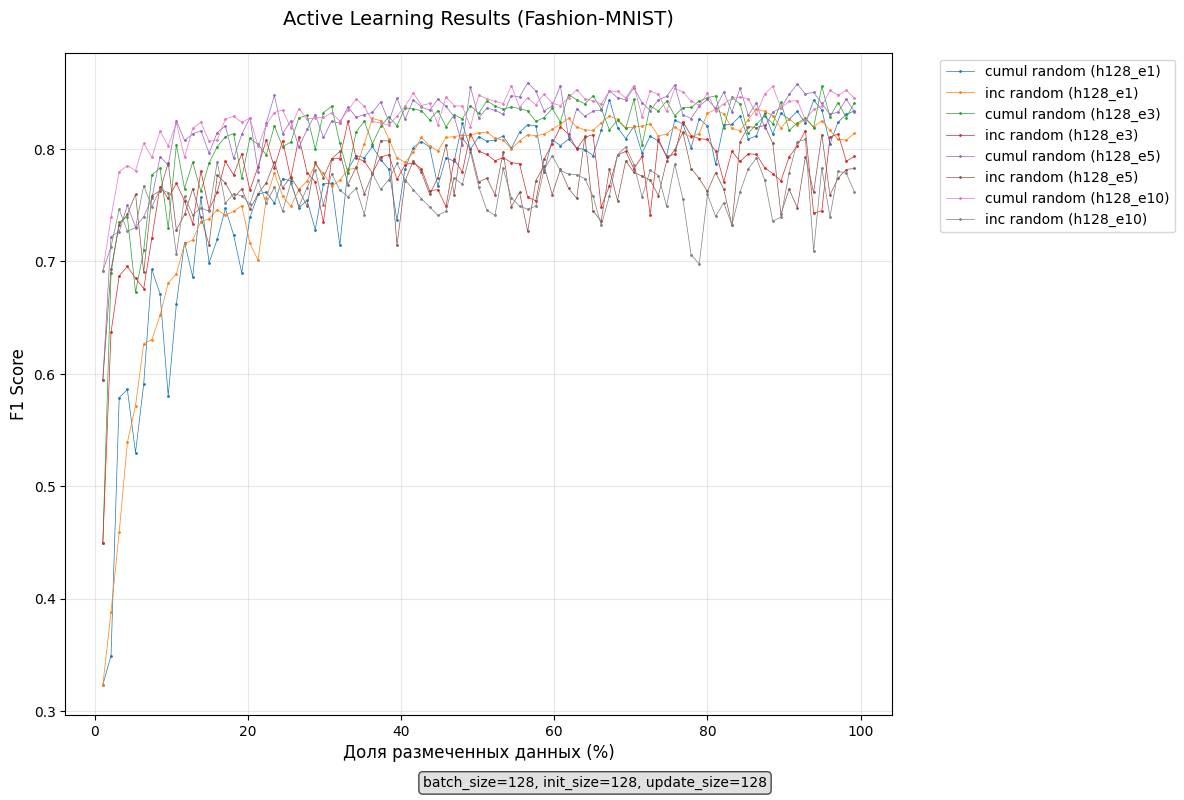

In [29]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="Fashion-MNIST")

Varying epochs on inc margin (Fashion-MNIST)

In [30]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=1)
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=3)
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=5)
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=10)
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=15)
AL6 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=20)
AL7 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=30)
AL8 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1", epochs=50)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)



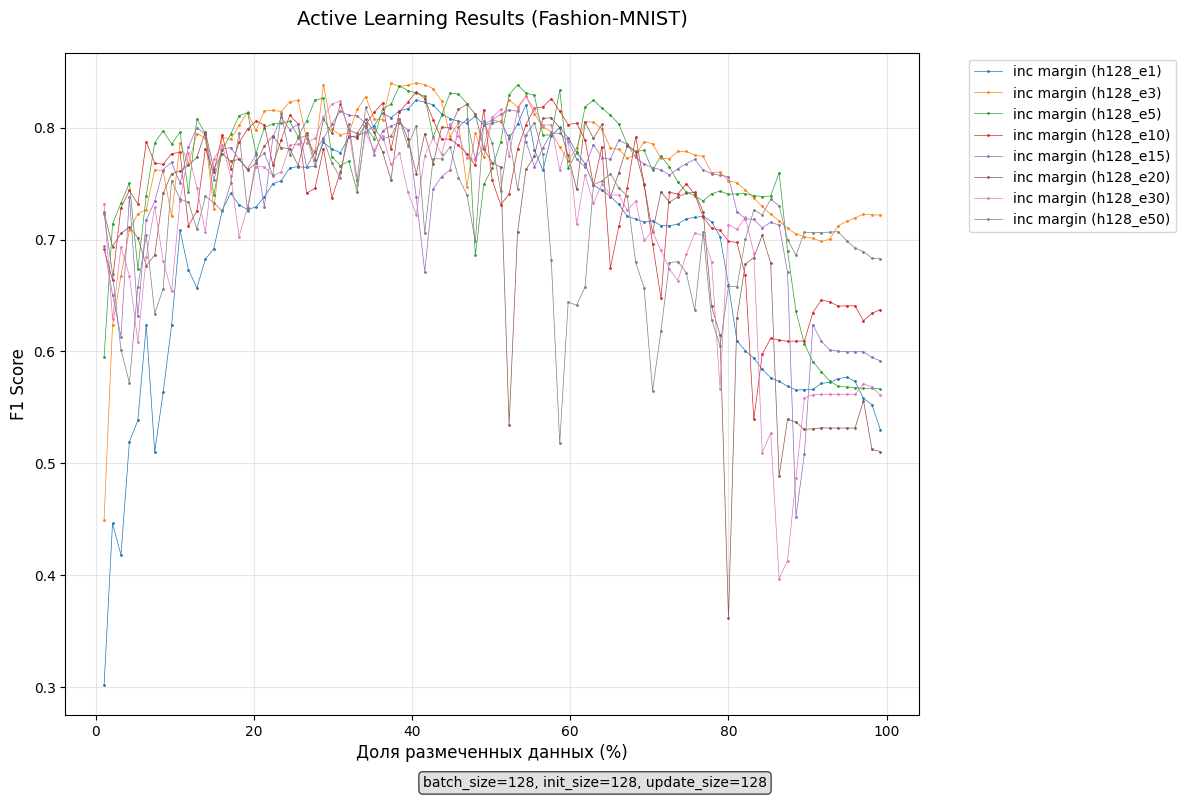

In [31]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name="Fashion-MNIST")

Varying update-size (Fashion-MNIST)

In [34]:
AL1 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=128, batch_size=128, metric="f1")
AL2 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=128, batch_size=128, metric="f1")
AL3 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=256, batch_size=128, metric="f1")
AL4 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=256, batch_size=128, metric="f1")
AL5 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=512, batch_size=128, metric="f1")
AL6 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=512, batch_size=128, metric="f1")
AL7 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="incremental", update_size=1024, batch_size=128, metric="f1")
AL8 = al.ActiveLearning(al.ANN(), X_train_fashion, y_train_fashion, X_test_fashion, y_test_fashion,
                    strategy="margin", al_type="cumulative", update_size=1024, batch_size=128, metric="f1")

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)

AL TRAINING STARTED (incremental margin)
AL TRAINING FINISHED (incremental margin)

AL TRAINING STARTED (cumulative margin)
AL TRAINING FINISHED (cumulative margin)



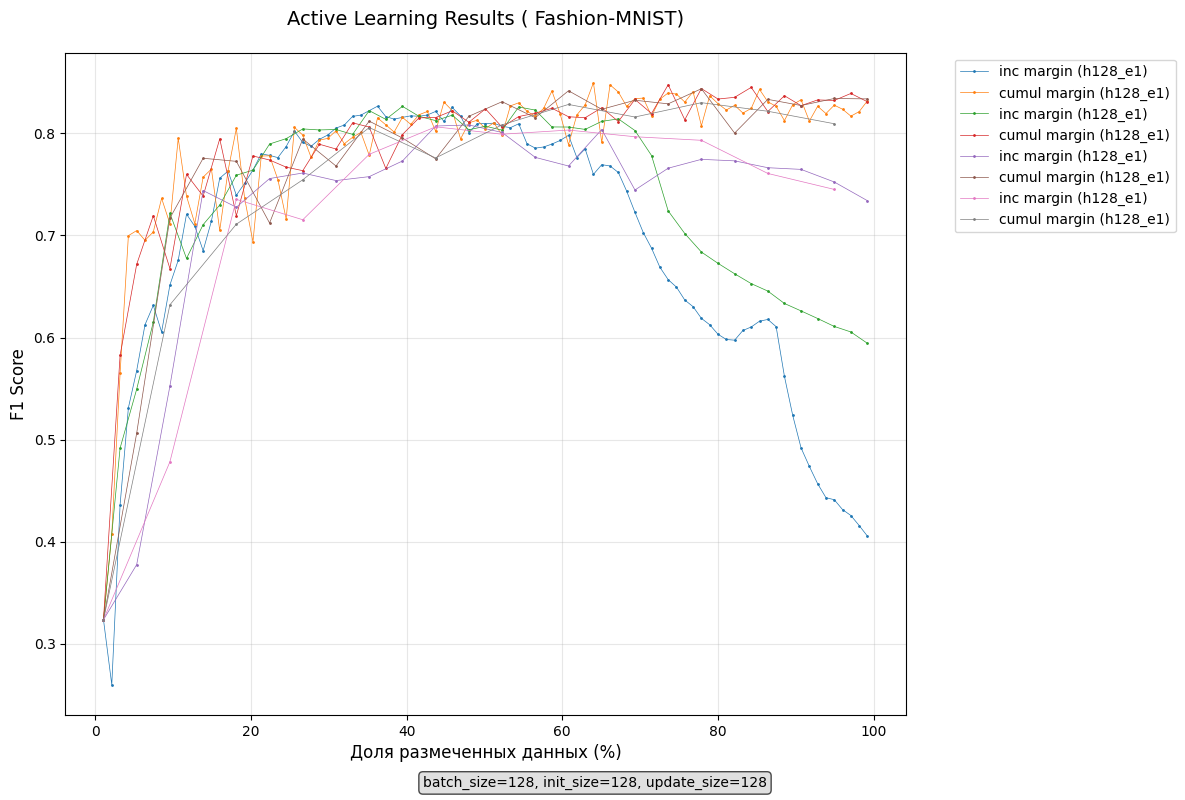

In [35]:
AL1.fit()
AL2.fit()
AL3.fit()
AL4.fit()
AL5.fit()
AL6.fit()
AL7.fit()
AL8.fit()
al.plot_active_learning_results_many(AL1, AL2, AL3, AL4, AL5, AL6, AL7, AL8, dataset_name=" Fashion-MNIST")